In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip uninstall -y kaggle
!pip install kaggle

Found existing installation: kaggle 1.5.16
Uninstalling kaggle-1.5.16:
  Successfully uninstalled kaggle-1.5.16
  Using cached kaggle-1.5.16-py3-none-any.whl


In [3]:
import os
os.environ["KAGGLE_USERNAME"] = "harshitha147"
os.environ["KAGGLE_KEY"] = "c81b9aec6796bee45a3dc8638bfffb8f"

In [4]:
!kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import os
from zipfile import ZipFile

file_name = "/content/imdb-dataset-of-50k-movie-reviews.zip"
destination_folder = "/content/drive/MyDrive/Classification"

#Folder doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Extarction logic
with ZipFile(file_name, 'r') as zip:
    zip.extractall(destination_folder)
    print('Done')

print(f'Extracted files are in: {os.path.abspath(destination_folder)}')


Done
Extracted files are in: /content/drive/MyDrive/Classification


In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Classification/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
print(df.shape)

print(df.isna().sum())

(50000, 2)
review       0
sentiment    0
dtype: int64


In [9]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
df['sentiment'] = df['sentiment'].apply(lambda x:0 if x == 'negative' else 1)

In [11]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

### Text Preprocessing

In [12]:
#Features and target
X = df['review']
y = df['sentiment']

In [13]:
# import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Initialize WordNet Lemmatizer
# lemmatizer = WordNetLemmatizer()

# # Lemmatize the words
# lemmatized_text = [' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(str(review))]) for review in X]

# # Use CountVectorizer after lemmatization
# vectorizer = CountVectorizer(stop_words = 'english')
# X = vectorizer.fit_transform(lemmatized_text)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)

(35000, 101895)
(15000, 101895)


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred_log_reg = log_reg_model.predict(X_test)
score_lr = round(accuracy_score(y_test, y_pred_log_reg),2)
print("Accuracy of Logistic Regression:", score_lr)

Accuracy of Logistic Regression: 0.89


In [19]:
from sklearn.metrics import confusion_matrix

conf_mtx_lr = confusion_matrix(y_test, y_pred_log_reg)

conf_mtx_lr_df = pd.DataFrame(conf_mtx_lr,
                     index = ['Negative','Positive'],
                     columns = ['Negative','Positive'])
conf_mtx_lr_df

,Negative,Positive
Negative,6567,844
Positive,775,6814


**Feature Importance - Top 15 words influcing the model**

<Axes: ylabel='Feature'>

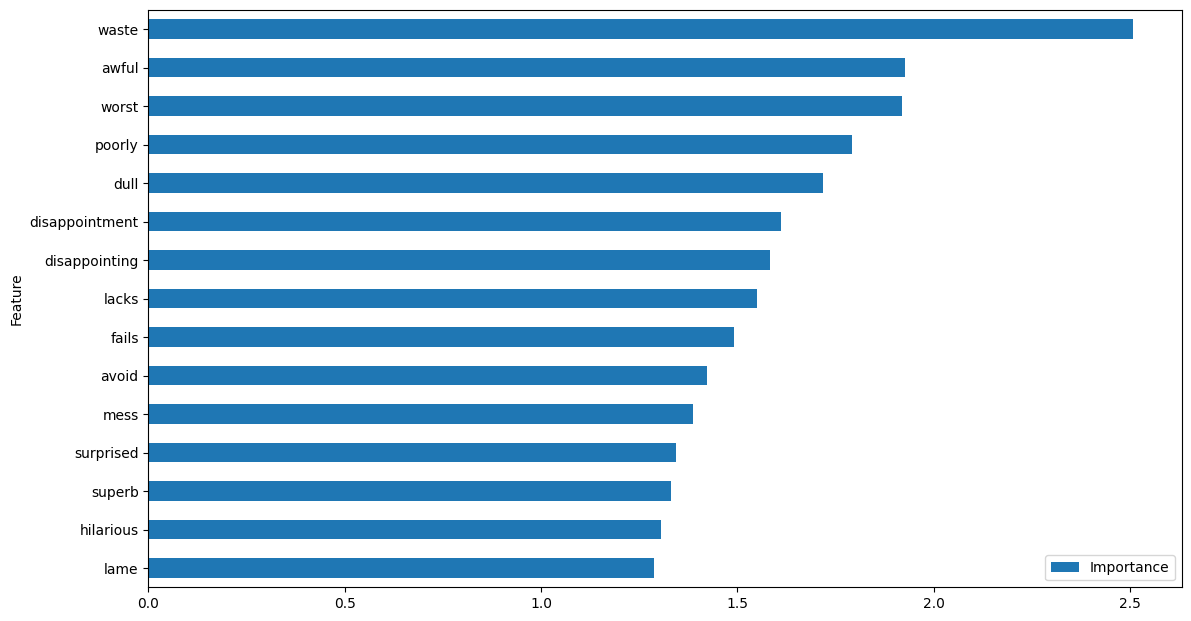

In [20]:
feature_names = vectorizer.get_feature_names_out()
coefficients = log_reg_model.coef_[0]

feature_imp = pd.DataFrame({'Feature': feature_names,
                            'Importance': np.abs(coefficients)})
top_words = 15
feature_imp_top = feature_imp.sort_values('Importance', ascending = True).tail(top_words)
feature_imp_top.plot(x='Feature',
                     y='Importance',
                     kind='barh',
                     figsize=(1280/96, 720/96))

### Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=0.005)
nb_model = nb.fit(X_train, y_train)

In [22]:
y_pred_nb = nb_model.predict(X_test)
score_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive bayes:", score_nb)

Accuracy of Naive bayes: 0.84


### Support Vector Machines

In [ ]:
from sklearn import svm

svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_model.fit(X_train, y_train)

# predict the labels on validation dataset
y_pred_svm = svm_model.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(y_test, y_pred_svm))

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
score_rf = round(accuracy_score(y_test, y_pred_rf), 2)
print("Accuracy of Random Forest:", score_rf)

Accuracy of Random Forest: 0.85


Convolutional Neural Network

Text must be cleaned and vectorized before it’s used to train a neural network, too, but vectorization is performed in a different way. Rather than create a table of word counts, you create a table of sequences containing tokens, which are typically indices into a dictionary, or vocabulary, created from the corpus of words in a dataset. To help, Keras provides the Tokenizer class, which you can think of as the deep-learning equivalent of CountVectorizer.

One revelation that comes from this is that Tokenizer converts text to lowercase and removes symbols, but it doesn’t remove stop words or numbers. If you want to remove stop words, you can use a separate library such as the Natural Language Toolkit (NLTK).

A neural network expects all sequences to be the same length. Keras’s pad_sequences function performs this final step, truncating sequences longer than the specified length and padding sequences shorter than the specified length with 0s.

The first hidden layer in a neural network that classifies text is an embedding layer whose job is to convert padded sequences of word indices into arrays of word vectors, which represent each word with an array of floating-point numbers rather than a single integer. Each word in the input text is represented by a vector in the embedding layer, and as the network is trained, vectors representing individual words are adjusted to reflect their relationship to one another. If you’re building a sentiment-analysis model and words such as “excellent” and “amazing” are generally associated with positive sentiment, then the vectors representing those words in the embedding space should be relatively close together so phrases such as “excellent service” and “amazing service” score similarly.

https://www.atmosera.com/blog/text-classification-with-neural-networks/



**Manual Preprocessing of text for Neural Networks**

In [25]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

X_nn = df.apply(lambda row: remove_stop_words(row['review']), axis=1)


Now use Keras’s Tokenizer class to tokenize the text and convert it into sequences, and pad_sequences to produce sequences that are all the same length

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 50000
max_length = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_nn)
sequences = tokenizer.texts_to_sequences(X_nn)
X_nn_padded = pad_sequences(sequences, maxlen=max_length)

the Conv1D layers process sequences of 7 words. The MaxPooling1D layer reduces the dimensionality of the output from the first Conv1D layer in an attempt to highlight important elements.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_length))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           1600000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 3

In [28]:
	cnn_model = model.fit(X_nn_padded, y, validation_split=0.2, epochs=5, batch_size=20)

Epoch 1/5
2000/2000 [==============================] - 54s 25ms/step - loss: 0.3463 - accuracy: 0.8385 - val_loss: 0.2812 - val_accuracy: 0.8811
Epoch 2/5
2000/2000 [==============================] - 49s 24ms/step - loss: 0.1554 - accuracy: 0.9426 - val_loss: 0.3164 - val_accuracy: 0.8798
Epoch 3/5
2000/2000 [==============================] - 47s 23ms/step - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.3971 - val_accuracy: 0.8736
Epoch 4/5
2000/2000 [==============================] - 50s 25ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.6910 - val_accuracy: 0.8606
Epoch 5/5
2000/2000 [==============================] - 48s 24ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.7884 - val_accuracy: 0.8670


[]

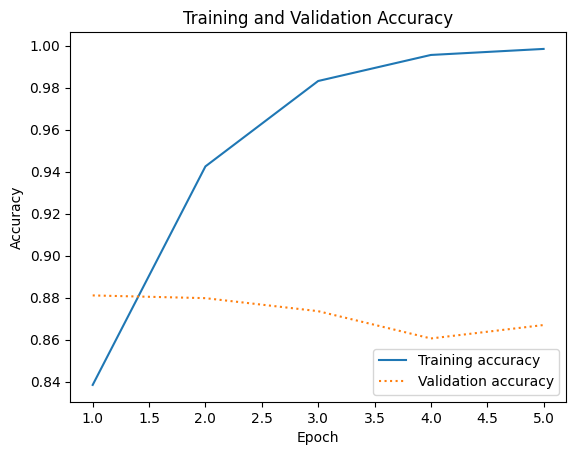

In [29]:
import matplotlib.pyplot as plt

acc = cnn_model.history['accuracy']
val = cnn_model.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

**Using Automating text vectorization**(Incomplete)

In [85]:
# from keras.layers import TextVectorization

# max_words = 500000
# max_length = 1000

# model = Sequential()
# model.add(TextVectorization(max_tokens=max_words, output_sequence_length=max_length))
# model.add(Embedding(max_words, 32, input_length=max_length))
# model.add(Conv1D(32, 7, activation='relu'))
# model.add(MaxPooling1D(5))
# model.add(Conv1D(32, 7, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
